# Tutorial Overview

The tutorial is broken into several sections and use-cases, which are each presented in their own notebook.

## What is TUKAN?

TUKAN is an API and web-platform that helps analysts and companies automate their workflows and enrich their models with standardized public data. It is good for:

* Automating reports that rely on public-datasets.
* Enrich decision making with external data.
* Augment machine-learning models with external sources.
* Joining datasets across multiple sources with ease. 

And most importantly:

<p style="font-size:30px">No data-cleaning required!</p>

## What do I need to work with TUKAN's API?

Just a couple of libraries. In general, TUKAN's API only requires `requests`, `json` and `pandas` for its usage.

We'll also import `matplotlib` to showcase some of the insights derived from the examples provided.

In [3]:
import requests 
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib import cm

Regarding authentication, all POST requests to our API require the following header.

In [7]:
token = "" # Your TOKEN goes here
url = 'http://api.tukanmx.com/v1/retrieve/'

headers = {
"Content-Type": "application/json",
"Authorization": "Token " + token
}

## What can I do with TUKAN?

#### Query a wide-array of indicators with a couple lines of code.

For example, let's take a look at Mexican GDP in constant terms since 2010. 

In [8]:
### Query and plot Mexican GDP since 2010

payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "categories": {
        "economic_activity": [
            "dfeefc621d16d0c"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_gdp_national",
            "variables": [
                "675882bced9ce54"
            ]
        }
    ],
    "from": "2010-01-01"
}

response = requests.post(url, headers = headers, data = json.dumps(payload))
gdp_data = pd.DataFrame(response.json()['data'])
gdp_data.head()


,date,economic_activity__ref,economic_activity,675882bced9ce54
0,2010-01-01,dfeefc621d16d0c,Economic activity,1.437172e+13
1,2010-04-01,dfeefc621d16d0c,Economic activity,1.499840e+13
2,2010-07-01,dfeefc621d16d0c,Economic activity,1.492145e+13
3,2010-10-01,dfeefc621d16d0c,Economic activity,1.549961e+13
4,2011-01-01,dfeefc621d16d0c,Economic activity,1.490273e+13


And now we plot our results in a fancy chart.

Text(0.5, 1.0, 'Mexican GDP (in MXN millions)')

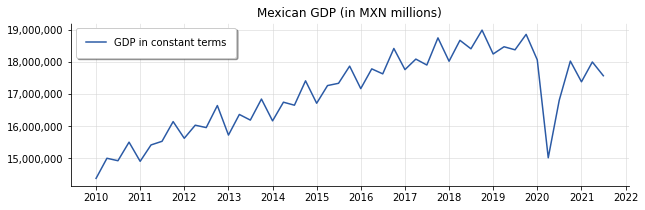

In [9]:
# Plot a fancy chart with the results
#---------------------------------------------------------------
gdp_data['date'] = pd.to_datetime(gdp_data['date'])

fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 1, 1)

ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")

ax.grid(color="lightgrey", lw = 0.5, zorder=1)

# Format axis
years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.plot(gdp_data['date'], gdp_data['675882bced9ce54']/1000000, color = "#2B5AA5", label = "GDP in constant terms")
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc = 'upper left')
ax.set_title("Mexican GDP (in MXN millions)")

#### Merge datasets with ease

For example, let's look at Mexican manufacturing GDP and the manufacturing orders indicator.

In [12]:
### Query and join Mexican Manufacturing GDP with the manufacturing orders indicator

## GDP payload
#-----------------------------------------------------------------------------
gdp_payload = {
    "type": "data_table",
    "operation": "yoy_growth_rel",
    "language": "en",
    "categories": {
        "economic_activity": [
            "faa2a8d0af8a72c"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_gdp_national",
            "variables": [
                "675882bced9ce54"
            ]
        }
    ],
    "from": "2010-01-11"
}

response = requests.post(url, headers = headers, data = json.dumps(gdp_payload))
gdp_data = pd.DataFrame(response.json()['data'])
gdp_data['date'] = pd.to_datetime(gdp_data['date'])

# Manufacturing Orders Indicator
#-----------------------------------------------------------------------------
moi_payload = {
    "type": "data_table",
    "operation": "avg",
    "term": "quarter",
    "language": "en",
    "categories": {
        "economic_activity": [
            "faa2a8d0af8a72c"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_emoe",
            "variables": [
                "07ec7d378e9f5f9"
            ]
        }
    ],
    "from": "2010-01-11"
}

response = requests.post(url, headers = headers, data = json.dumps(moi_payload))
moi_data = pd.DataFrame(response.json()['data'])
moi_data['date'] = pd.to_datetime(moi_data['date'])


Now that we have the data, we do a simple `merge` and plot the results.

In [13]:
merged_df = pd.merge(gdp_data, moi_data)
merged_df.head()

,date,economic_activity__ref,economic_activity,675882bced9ce54,07ec7d378e9f5f9
0,2010-01-01,faa2a8d0af8a72c,Manufacturing,0.083504,53.037667
1,2010-04-01,faa2a8d0af8a72c,Manufacturing,0.134897,54.103333
2,2010-07-01,faa2a8d0af8a72c,Manufacturing,0.089120,52.734000
3,2010-10-01,faa2a8d0af8a72c,Manufacturing,0.044953,52.209333
4,2011-01-01,faa2a8d0af8a72c,Manufacturing,0.046967,54.035667


(40.0, 60.0)

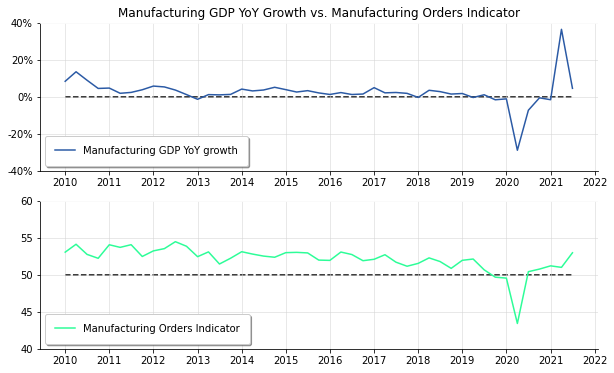

In [14]:
# Plot a fancy chart with the results
#---------------------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(2, 1, 1)
ax_2 = fig.add_subplot(2, 1, 2)

for axs in fig.get_axes():
    axs.spines["top"].set_color("white")
    axs.spines["right"].set_color("white")

    axs.grid(color="lightgrey", lw = 0.5, zorder=1)

    # Format axis
    years = mdates.YearLocator()   # every year
    years_fmt = mdates.DateFormatter('%Y')
    axs.xaxis.set_major_locator(years)
    axs.xaxis.set_major_formatter(years_fmt)

ax.plot(merged_df['date'], merged_df['675882bced9ce54'], color = "#2B5AA5", label = "Manufacturing GDP YoY growth")
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc = "lower left")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0%}'))
ax.hlines(0, xmin = merged_df['date'].min(), xmax = merged_df['date'].max(), ls='--', color = 'black', zorder = - 1)
ax.set_ylim(-.40,.40)
ax.set_title("Manufacturing GDP YoY Growth vs. Manufacturing Orders Indicator")

ax_2.plot(merged_df['date'], merged_df['07ec7d378e9f5f9'], color = "#2dfd98", label = "Manufacturing Orders Indicator")
ax_2.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc = "lower left")
ax_2.hlines(50, xmin = merged_df['date'].min(), xmax = merged_df['date'].max(), ls='--', color = 'black', zorder = - 1)
ax_2.set_ylim(40,60)


## Next Section

In the [following notebook](01_tukan_model.ipynb), we'll showcase how to get you set-up and the basics behind our data model and catalog.